Data Science
Foundation Project - Automobile

In [1]:
pwd

'C:\\Users\\ravi\\PythonUPX\\Data Analytics with Python\\Projects'

In [2]:
cd attachment_Project_Datasets

C:\Users\ravi\PythonUPX\Data Analytics with Python\Projects\attachment_Project_Datasets


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
import seaborn as sns       
%matplotlib inline


# Loading Dataset

In [4]:
ds = pd.read_csv('Automobile_data.txt')

In [5]:
ds.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
ds.info()
ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
ds.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Cleaning Dataset by replacing Null Values

In [8]:
ds['normalized-losses'][ds['normalized-losses'] == "?"].count()

41

In [9]:
normalized_losses_mean =ds['normalized-losses'][ds['normalized-losses'] != "?"].astype(int).mean()
ds['normalized-losses'] = ds['normalized-losses'].replace("?",normalized_losses_mean).astype(int)
ds['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [10]:
ds['num-of-doors'][ds['num-of-doors'] == "?"].count()

2

In [11]:
door_mode = ds['num-of-doors'].mode()
ds['num-of-doors'] =ds['num-of-doors'].str.replace("?",'door_mode')

In [12]:
ds['num-of-doors'][ds['num-of-doors'] == "?"].count()

0

In [13]:
ds['bore'][ds['bore'] == "?"].count()

4

In [14]:
#bore is the diameter of each cylinder. helps understand the engine displacement.
normalized_bore_mean =ds['bore'][ds['bore'] != "?"].astype(float).mean()
ds['bore'] = ds['bore'].replace("?",normalized_bore_mean).astype(float)
ds['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [15]:
ds['stroke'][ds['stroke'] == "?"].count()

4

In [16]:
normalized_stroke_mean =ds['stroke'][ds['stroke'] != "?"].astype(float).mean()
ds['stroke'] = ds['stroke'].replace("?",normalized_stroke_mean).astype(float)
ds['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [17]:
ds['horsepower'][ds['horsepower'] == "?"].count()

2

In [18]:
normalized_horsepower_mean =ds['horsepower'][ds['horsepower'] != "?"].astype(int).mean()
ds['horsepower'] = ds['horsepower'].replace("?",normalized_horsepower_mean).astype(int)
ds['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [19]:
ds['peak-rpm'][ds['peak-rpm'] == "?"].count()

2

In [20]:
normalized_peak_rpm_mean = ds['peak-rpm'][ds['peak-rpm'] != "?"].astype(int).mean()
ds['peak-rpm'] = ds['peak-rpm'].replace("?",normalized_peak_rpm_mean).astype(int)
ds['peak-rpm'].head()

0    5000
1    5000
2    5000
3    5500
4    5500
Name: peak-rpm, dtype: int32

In [21]:
ds['price'][ds['price'] == "?"].count()

4

In [22]:
normalized_price_mean = ds['price'][ds['price'] != "?"].astype(int).mean()
ds['price'] = ds['price'].replace("?",normalized_price_mean).astype(int)
ds['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [24]:
correlation = ds[['normalized-losses','wheel-base', 'length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].corr()
correlation

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095
compression-ratio,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,0.186105,1.000000,-0.205717,-0.435933,0.324701,0.265201,0.070990


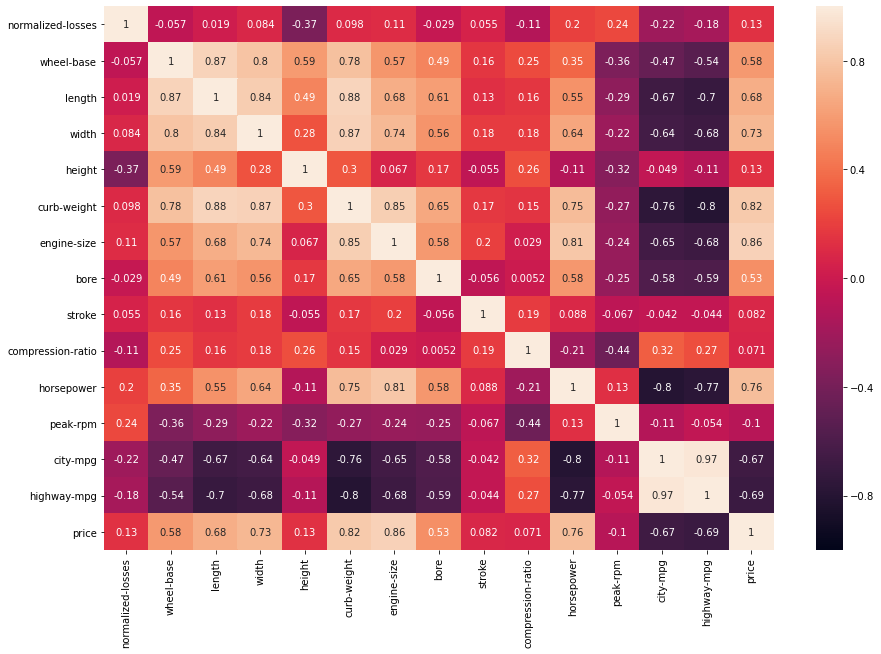

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot=True)

Findings:
Curb weight is mostly correlated with engine size, length, width and wheel base
Engine-size is correlated with horsepower
Wheel-base is highly correlated with length and width of the car
Price is more correlated with engine size and curb-weight of the car

# Univariate and Bivariate Analysis

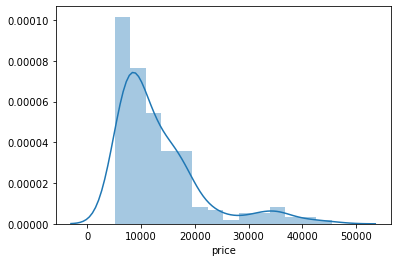

In [26]:
sns.distplot(ds['price'])

Findings from above plot:
Price range of the cars is distributed majorly around $10000

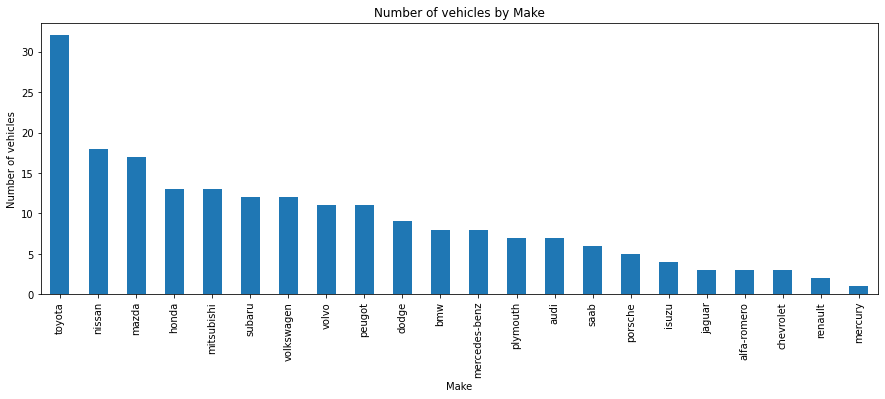

In [27]:
ds.make.value_counts().nlargest(30).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Dataset has more cars for make Toyota followed by Nissan, Mazda and rest follows

<function matplotlib.pyplot.show(*args, **kw)>

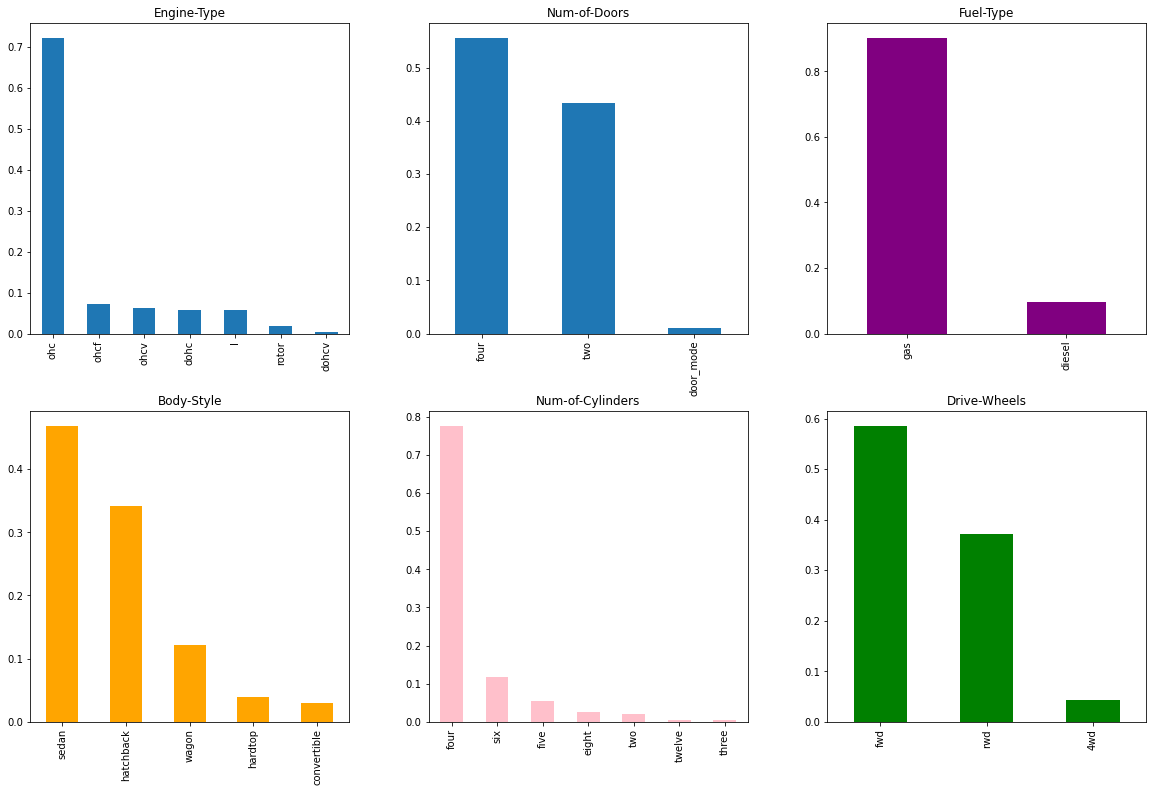

In [51]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.25,wspace=0.25)
plt.subplot(3,3,1)
plt.title('Engine-Type')
ds['engine-type'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(3,3,2)
plt.title('Num-of-Doors')
ds['num-of-doors'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(3,3,3)
plt.title('Fuel-Type')
ds['fuel-type'].value_counts(normalize= True).plot(kind='bar',color='purple')
plt.subplot(3,3,4)
plt.title("Body-Style")
ds['body-style'].value_counts(normalize=True).plot(kind='bar',color='orange')
plt.subplot(3,3,5)
plt.title("Num-of-Cylinders")
ds['num-of-cylinders'].value_counts(normalize=True).plot(kind='bar',color='pink')
plt.subplot(3,3,6)
plt.title("Drive-Wheels")
ds['drive-wheels'].value_counts(normalize=True).plot(kind='bar',color='green')
plt.show

More than 70 % of the vehicle has Ohc type of Engine
57% of the cars has 4 doors
Gas is preferred by 85 % of the vehicles
Most produced vehicle are of body style sedan around 48% followed by hatchback 32%
78% of cars have 4 cylinders 
fwd cars are more popular followed by rwd and 4wd constitute very less population.

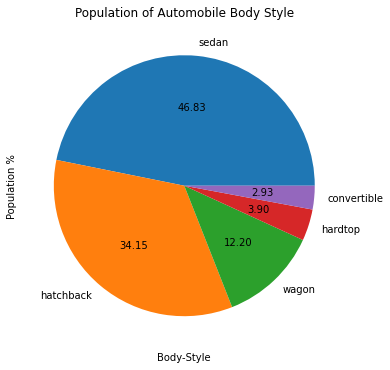

In [29]:
ds['body-style'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Population of Automobile Body Style")
plt.ylabel('Population %')
plt.xlabel('Body-Style');

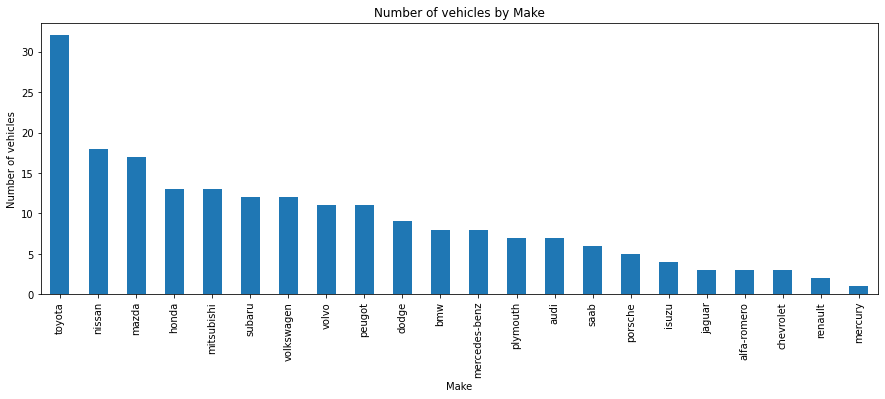

In [30]:
ds.make.value_counts().nlargest(30).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

<function matplotlib.pyplot.show(*args, **kw)>

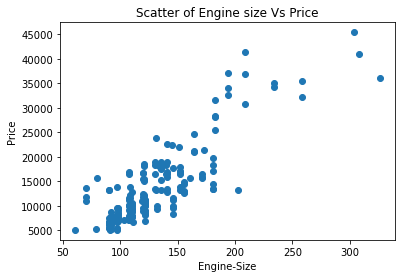

In [31]:
x=ds['engine-size']
y=ds['price']
plt.scatter(x,y)
plt.title("Scatter of Engine size Vs Price")
plt.xlabel('Engine-Size')
plt.ylabel('Price')
plt.show

From scatterplot we see as the engine size goes up, the price of the car also goes up. This indicates that there is positive linear relationship between these two variables.

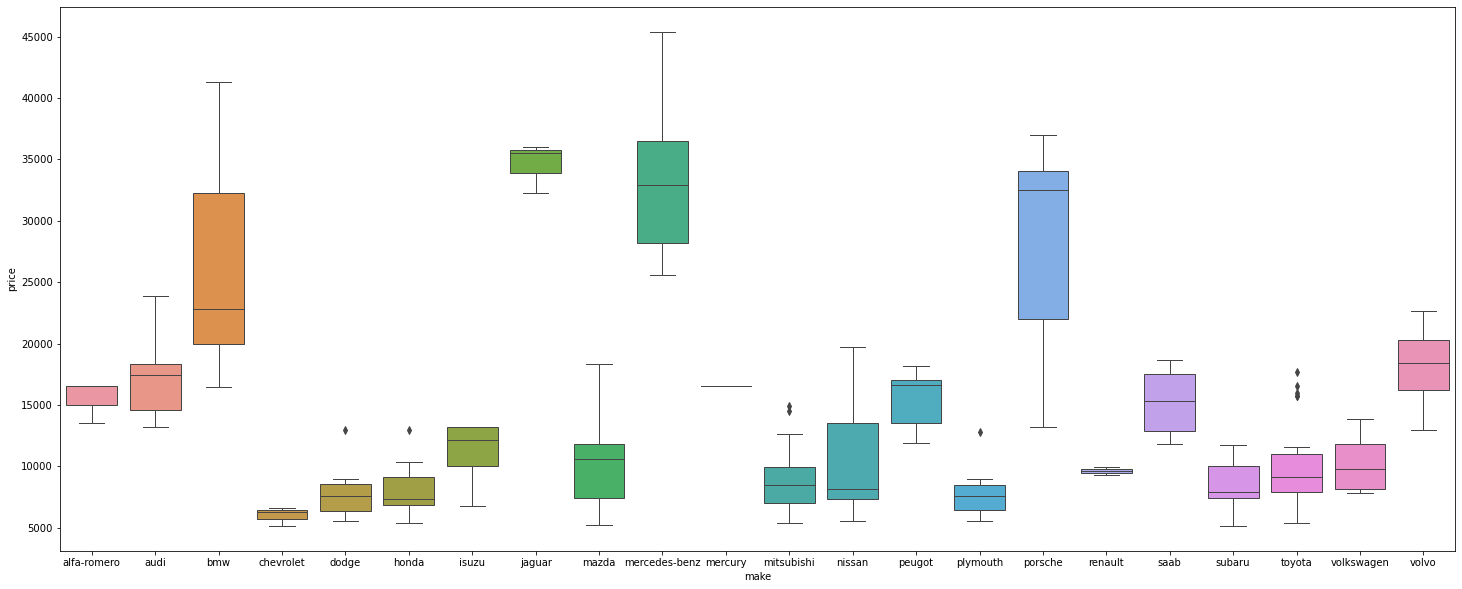

In [32]:
plt.figure(figsize=(25,10))
sns.boxplot(x="make", y="price",data=ds, linewidth=1)
plt.show()

Prices of cars made by Mecedes-Benz, Jaguar, Porshe & BMW are relatively higher than the rest.
Toyoto, Nissan and Mazda who were largest in the dataset has price range which is economical.

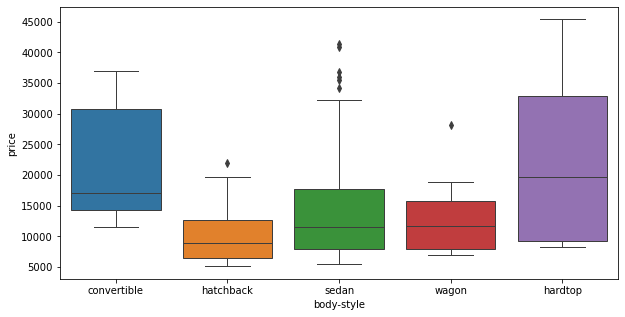

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x="body-style", y="price",data=ds, linewidth=1)
plt.show()

Hardtop model are expensive in prices followed by convertible and sedan body style

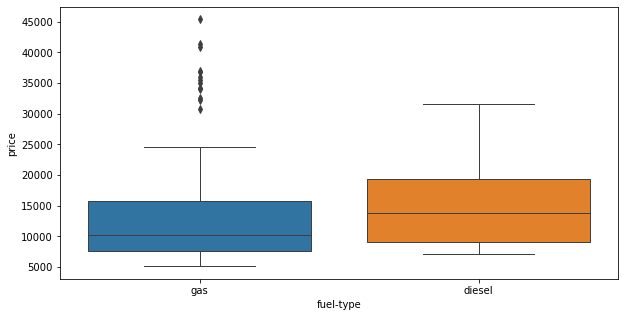

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x="fuel-type", y="price",data=ds, linewidth=1)
plt.show()

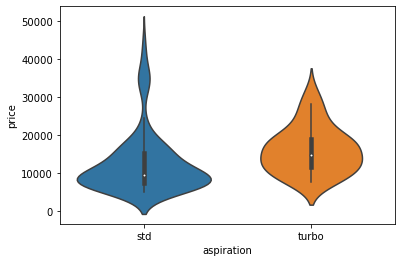

In [35]:
sns.violinplot(x='aspiration', y='price', data=ds)

Turbo models have higher prices than for the standard model

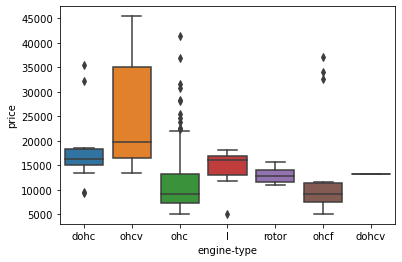

In [36]:
sns.boxplot(x="engine-type",y="price",data=ds)
plt.show()

ohcv type of engine based cars has highest  price range and rest of the engine types fall under 20000 prices

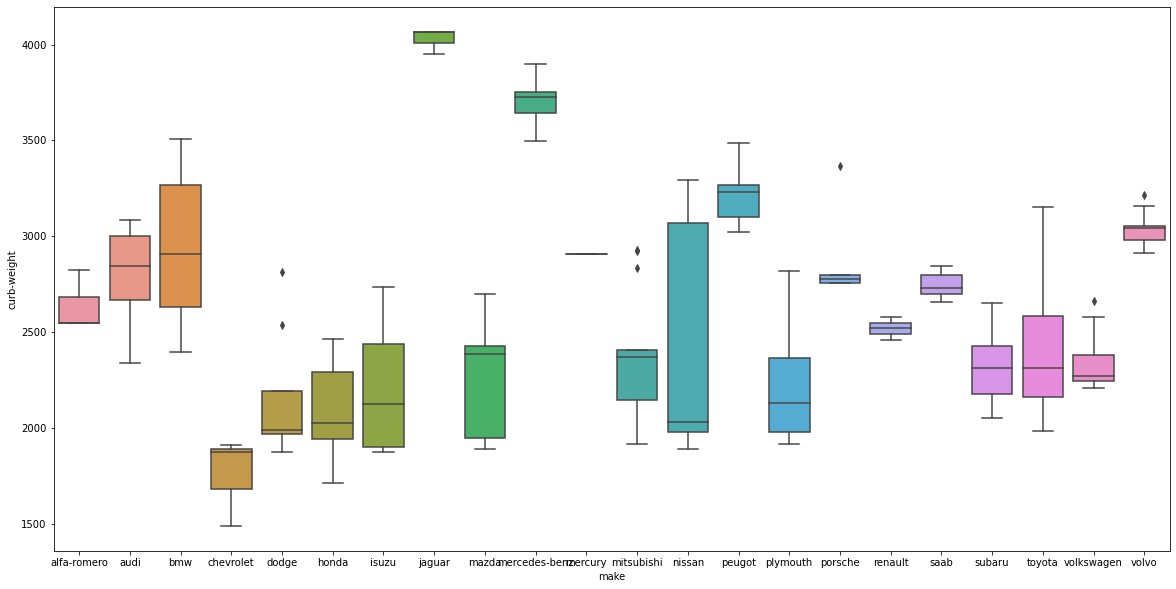

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x="make",y="curb-weight",data=ds)
plt.show()

Jaguar has the highest Curb-Weight compared to all other models in the dataset.
Chevlolet has the lowest Curb-Weight.

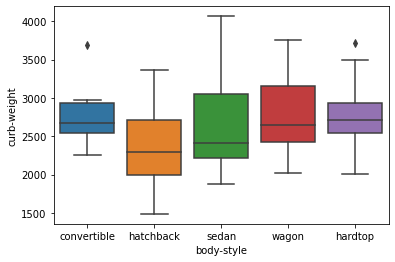

In [38]:
sns.boxplot(x="body-style",y="curb-weight",data=ds)
plt.show()

Curb-Weight of Sedan & Wagon cars seems to be higher than other body styles

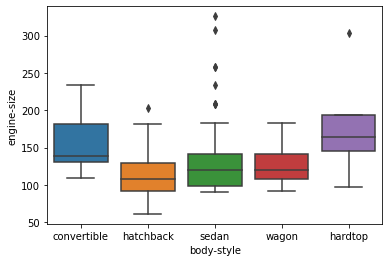

In [39]:
sns.boxplot(x="body-style",y="engine-size",data=ds)
plt.show()

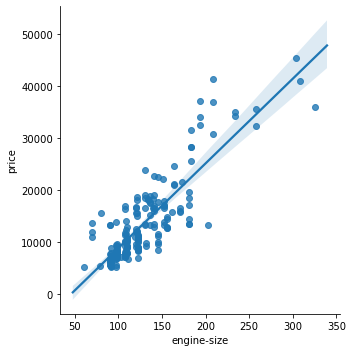

In [40]:
sns.lmplot('engine-size',"price",ds)

As the engine size increases price of the car increases
Majority of the cars engine sizes range between 100-200

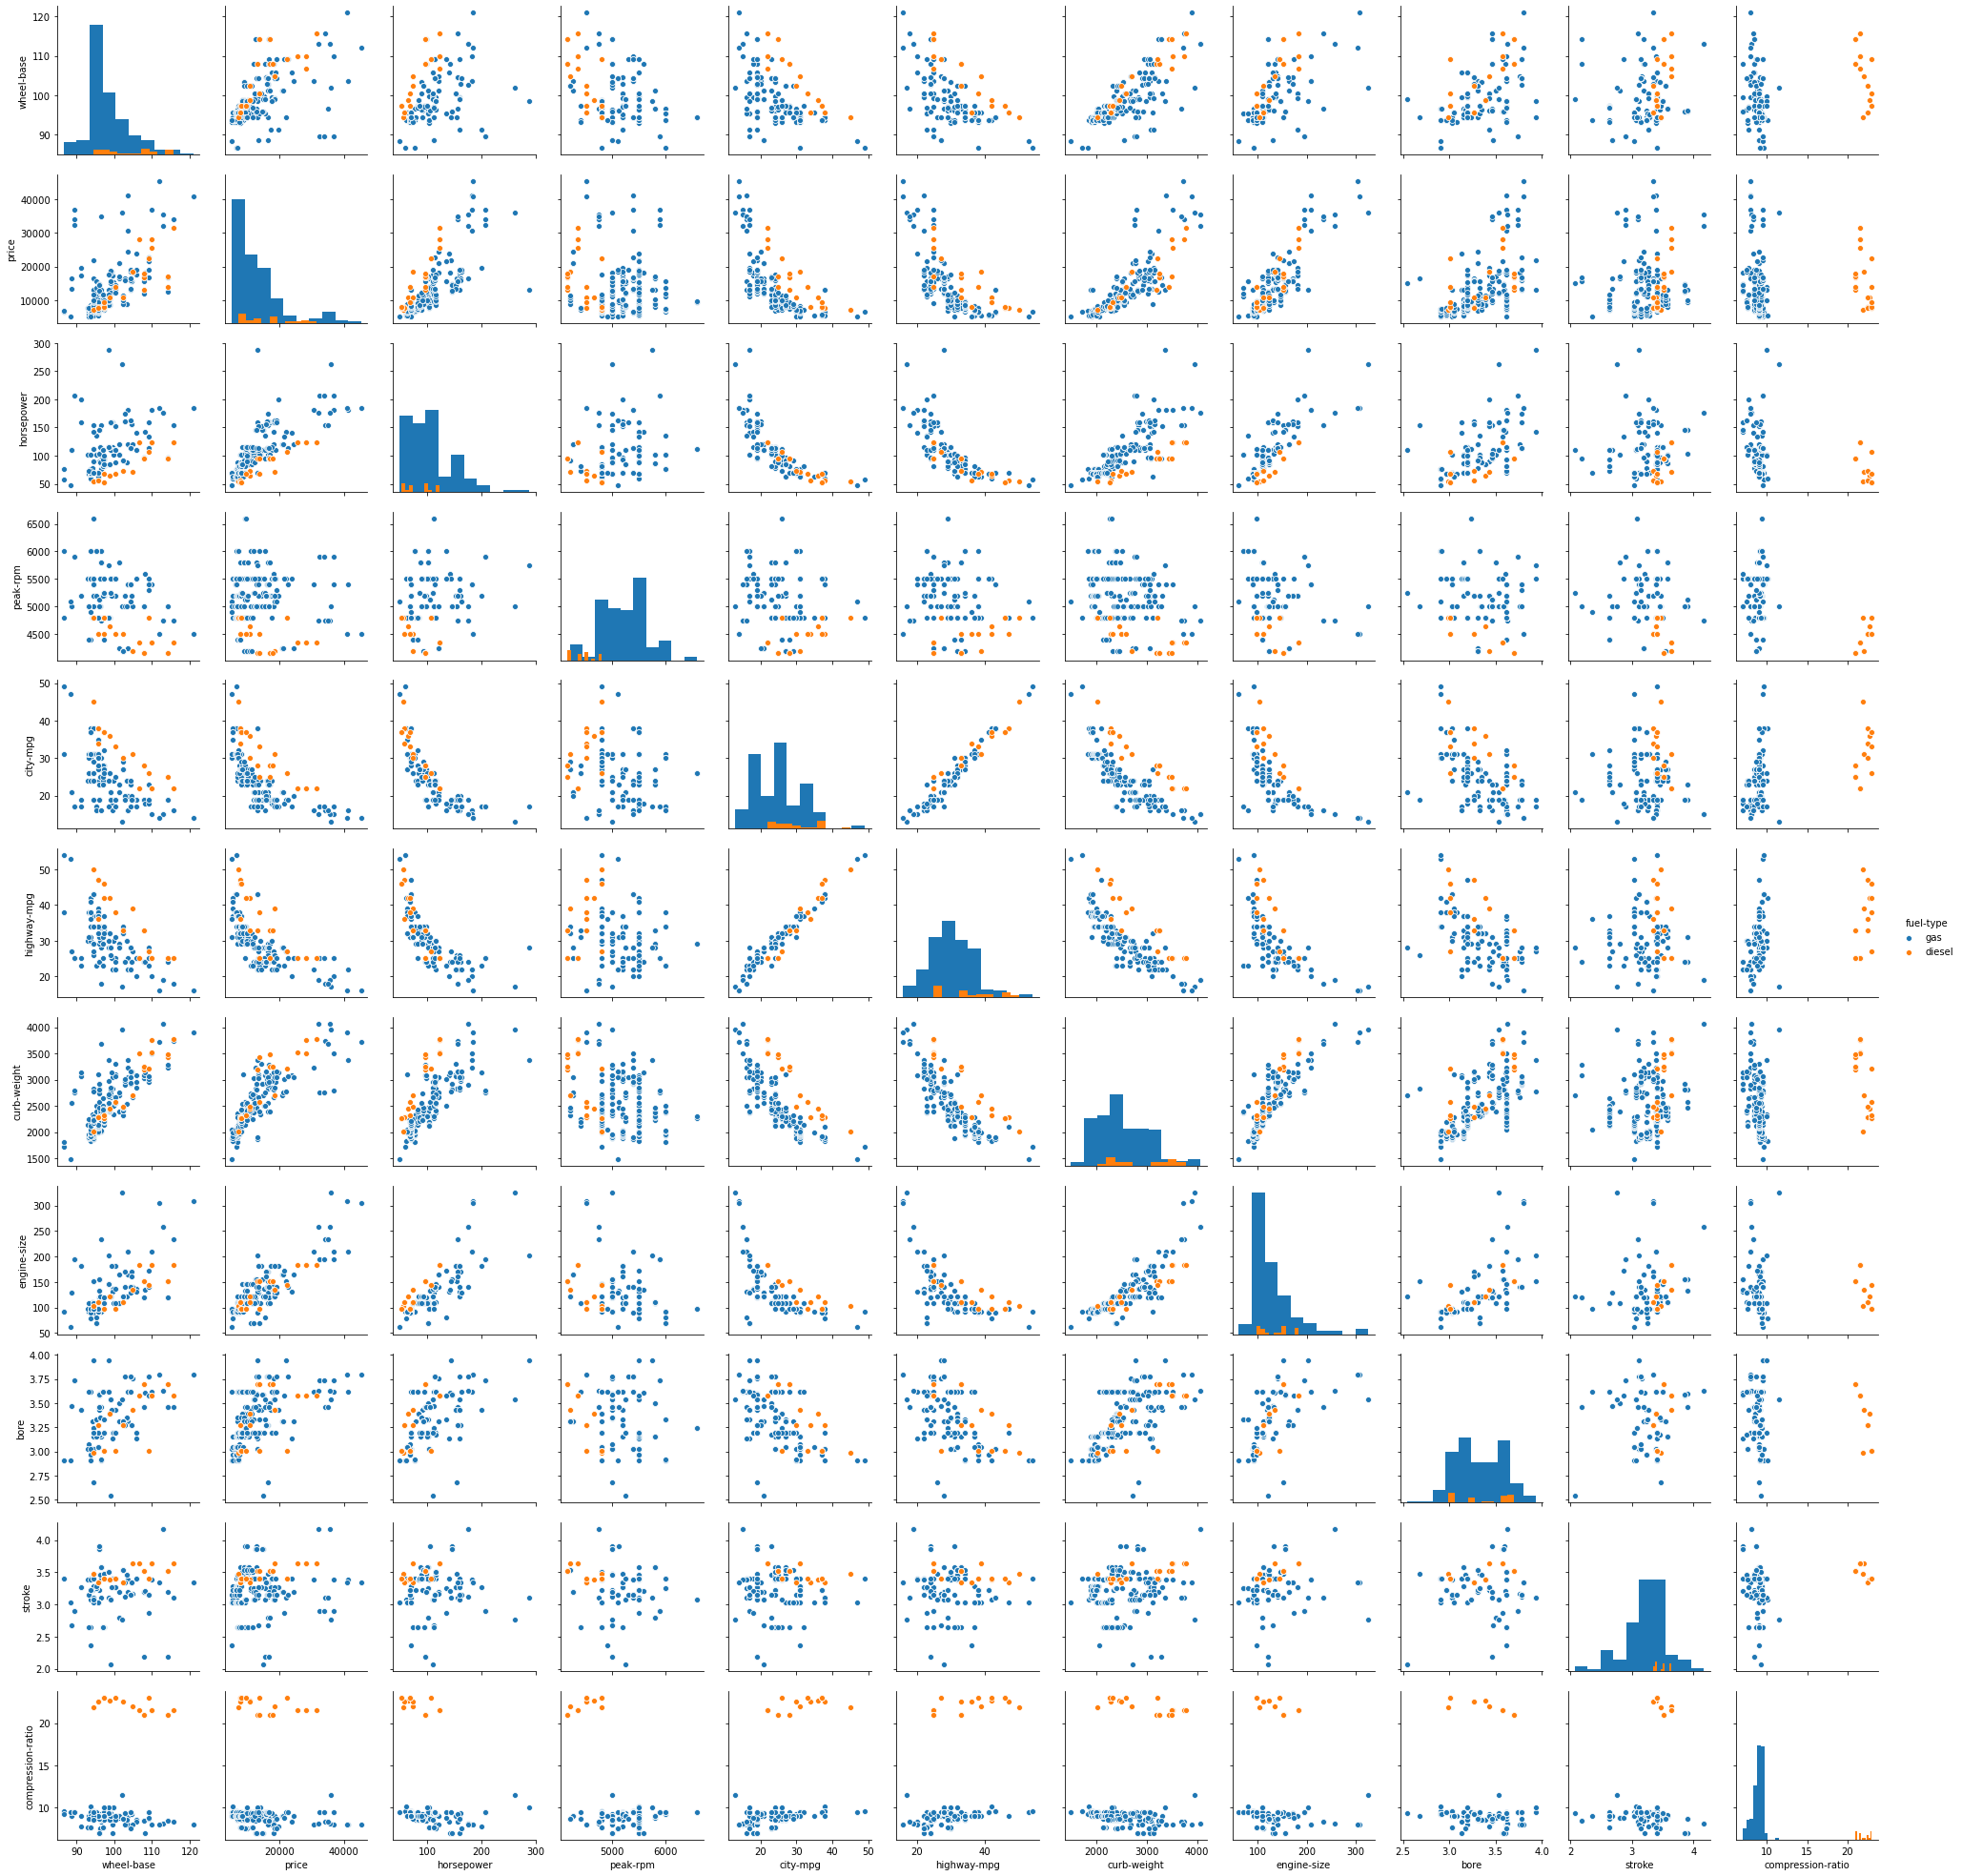

In [41]:
Pair = sns.pairplot(ds[["wheel-base","price","horsepower","peak-rpm","city-mpg","highway-mpg",
                                "curb-weight","engine-size","bore","stroke","compression-ratio","fuel-type"]], 
                 hue="fuel-type", diag_kind="hist")


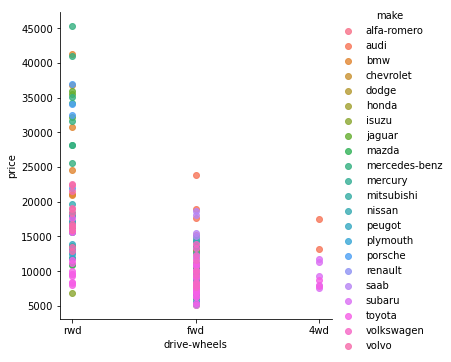

In [42]:
sns.lmplot('drive-wheels',"price", ds, hue="make", fit_reg=False)

Majority of the cars have rwd (rear wheel drive) and prices of which are spread from min to max

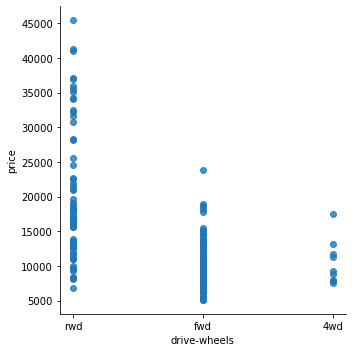

In [43]:
sns.lmplot("drive-wheels","price", ds, fit_reg=False);

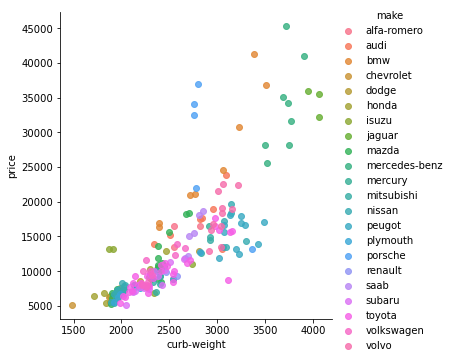

In [44]:
sns.lmplot('curb-weight',"price", ds, hue="make", fit_reg=False)

Curb-weight has positive correlation in terms of price.